___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import datetime as dt
from skimpy import clean_columns
import datetime, nltk, warnings
import itertools

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble

from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot


plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.2f' % x)

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#### Load Dataset

In [2]:
df0 = pd.read_csv('Mall_Customers.csv')

In [3]:
df = df0.copy()
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Explore Data

You can rename columns to more usable, if you need.

In [4]:
df.rename(columns={'Annual Income (k$)':'Annual_Income_k$','Spending Score (1-100)':'Spending_Score_1-100'},inplace=True)

In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   CustomerID            200 non-null    int64 
 1   Gender                200 non-null    object
 2   Age                   200 non-null    int64 
 3   Annual_Income_k$      200 non-null    int64 
 4   Spending_Score_1-100  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual_Income_k$,Spending_Score_1-100
count,200.00,200.00,200.00,200.00
mean,100.50,38.85,60.56,50.20
std,57.88,13.97,26.26,25.82
min,1.00,18.00,15.00,1.00
25%,50.75,28.75,41.50,34.75
50%,100.50,36.00,61.50,50.00
75%,150.25,49.00,78.00,73.00
max,200.00,70.00,137.00,99.00


In [8]:
df.drop(columns= "CustomerID", inplace=True)

In [9]:
df.nunique()

Gender                   2
Age                     51
Annual_Income_k$        64
Spending_Score_1-100    84
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()*100/df.shape[0]

Gender                 0.00
Age                    0.00
Annual_Income_k$       0.00
Spending_Score_1-100   0.00
dtype: float64

In [12]:
df.sample(30)

,Gender,Age,Annual_Income_k$,Spending_Score_1-100
3,Female,23,16,77
175,Female,30,88,86
116,Female,63,65,43
77,Male,40,54,48
43,Female,31,39,61
186,Female,54,101,24
61,Male,19,46,55
36,Female,42,34,17
178,Male,59,93,14
118,Female,51,67,43


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





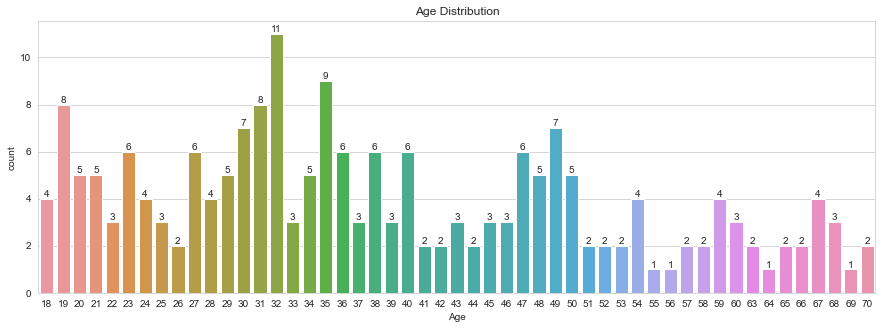

In [13]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x ='Age', data = df)
ax.bar_label(ax.containers[0])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show();

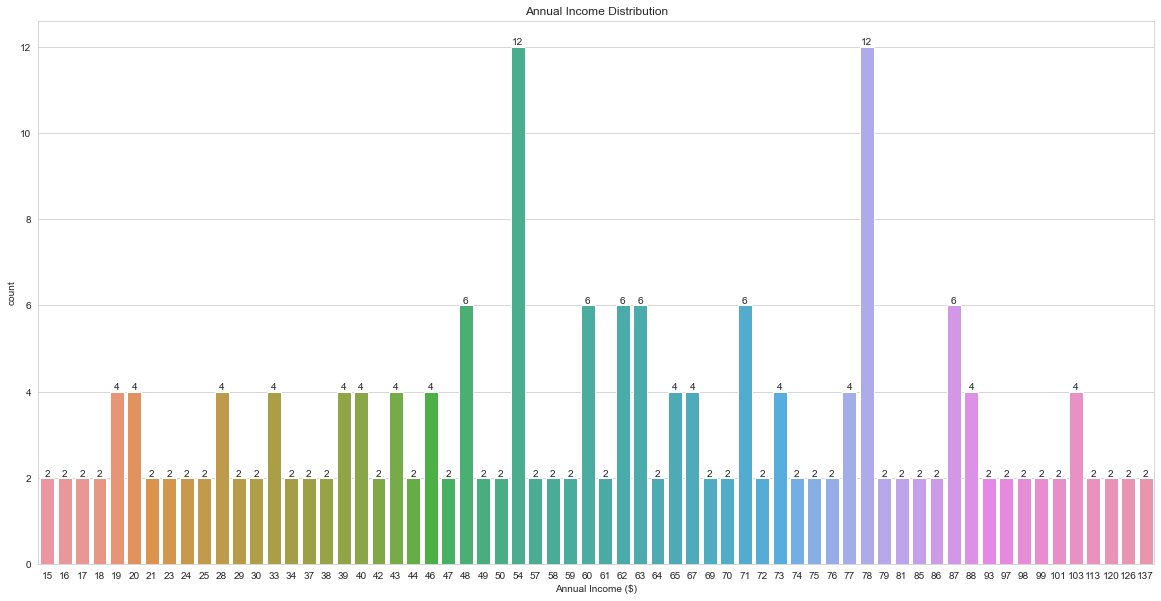

In [14]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Annual_Income_k$', data=df)
ax.bar_label(ax.containers[0])
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income ($)')
plt.show();

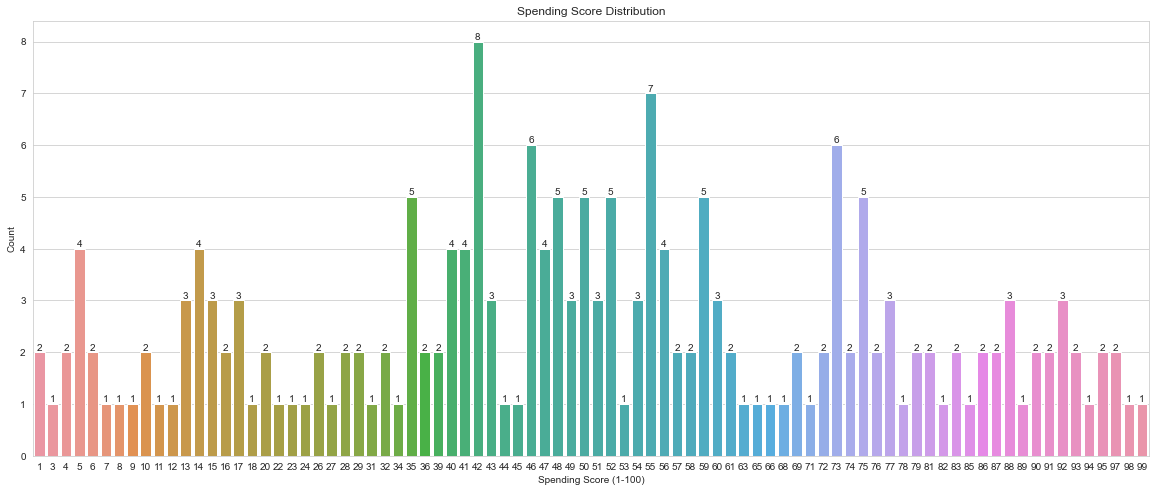

In [15]:
plt.figure(figsize=(20,8))
ax=sns.countplot(x='Spending_Score_1-100', data=df)
ax.bar_label(ax.containers[0])
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Count')
plt.show();

Text(0, 0.5, 'Count')

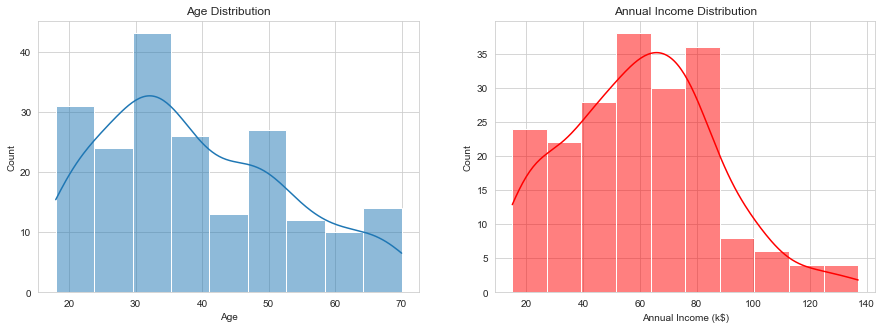

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df, kde =True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.histplot(x ='Annual_Income_k$', data=df, color='red', kde = True)
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')

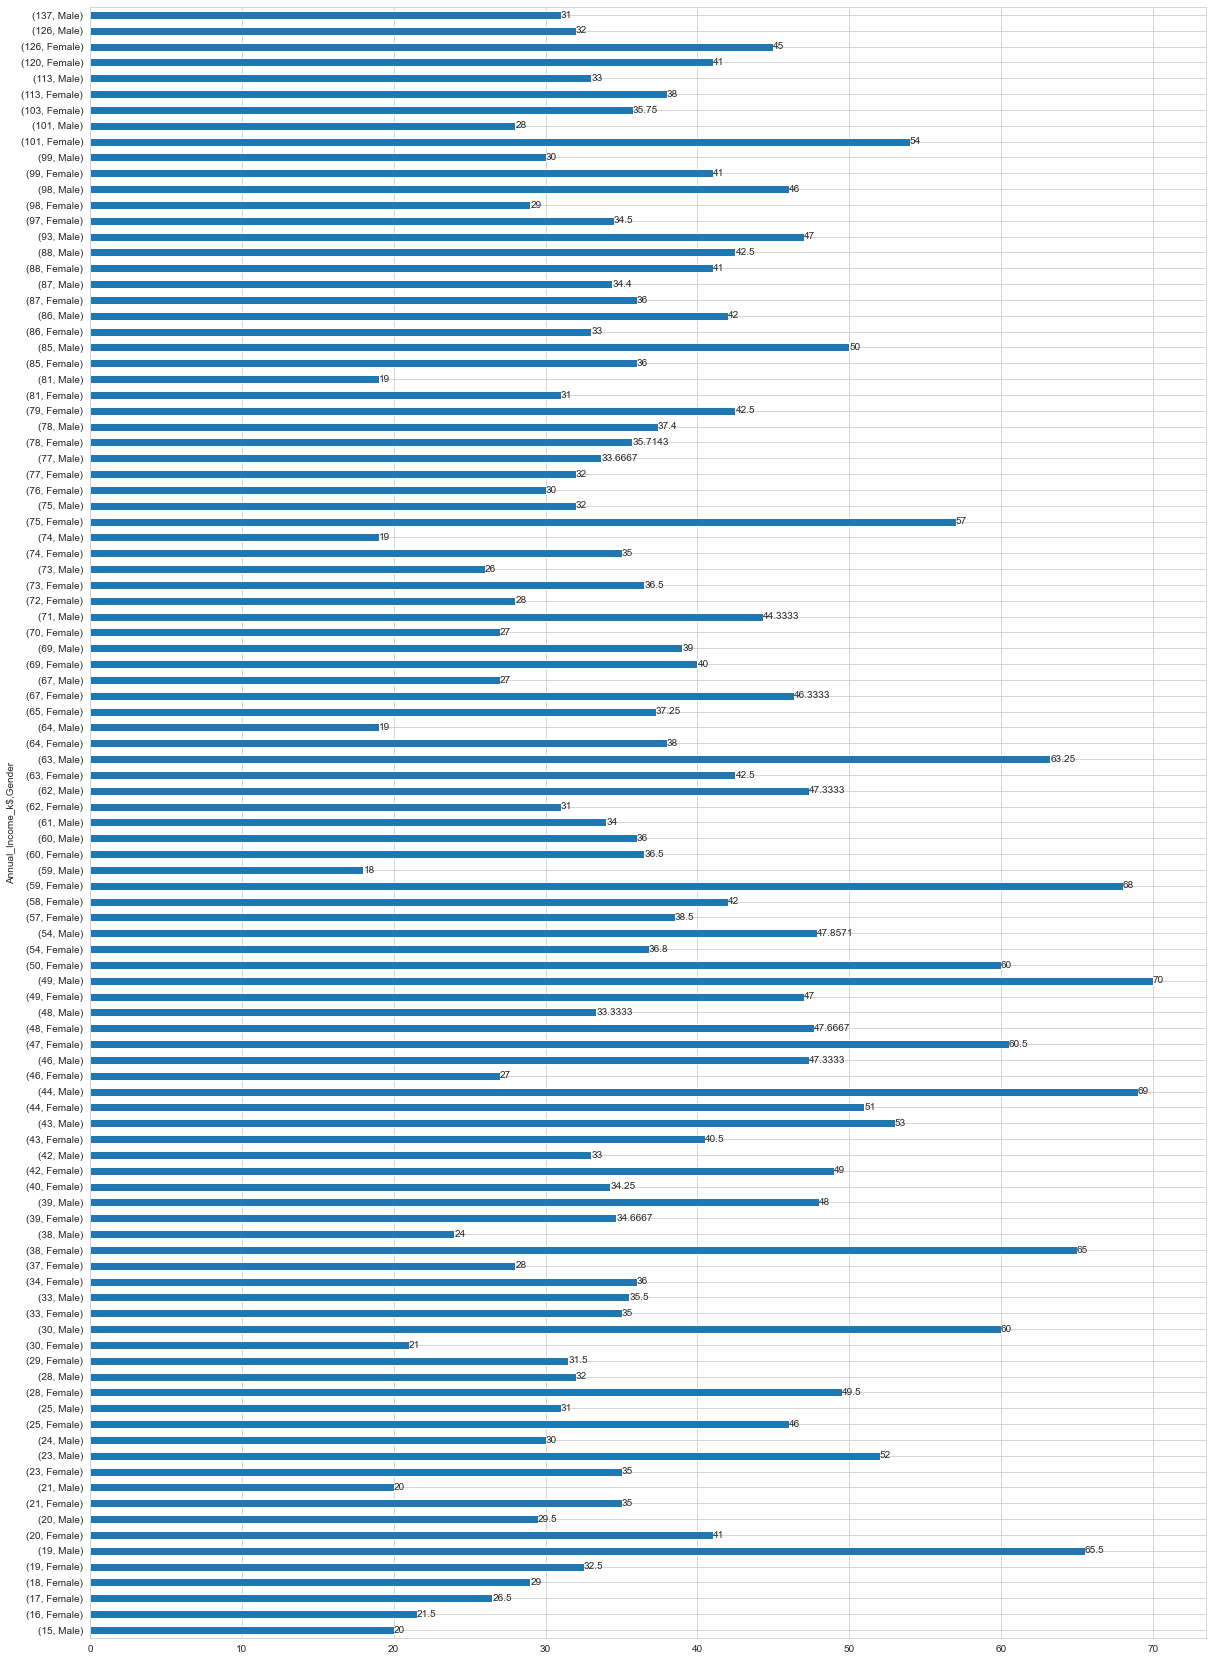

In [17]:

plt.figure(figsize=(20,30))

ax = df.groupby(["Annual_Income_k$", "Gender"]).Age.mean().plot.barh()

for container in ax.containers:
    ax.bar_label(container);

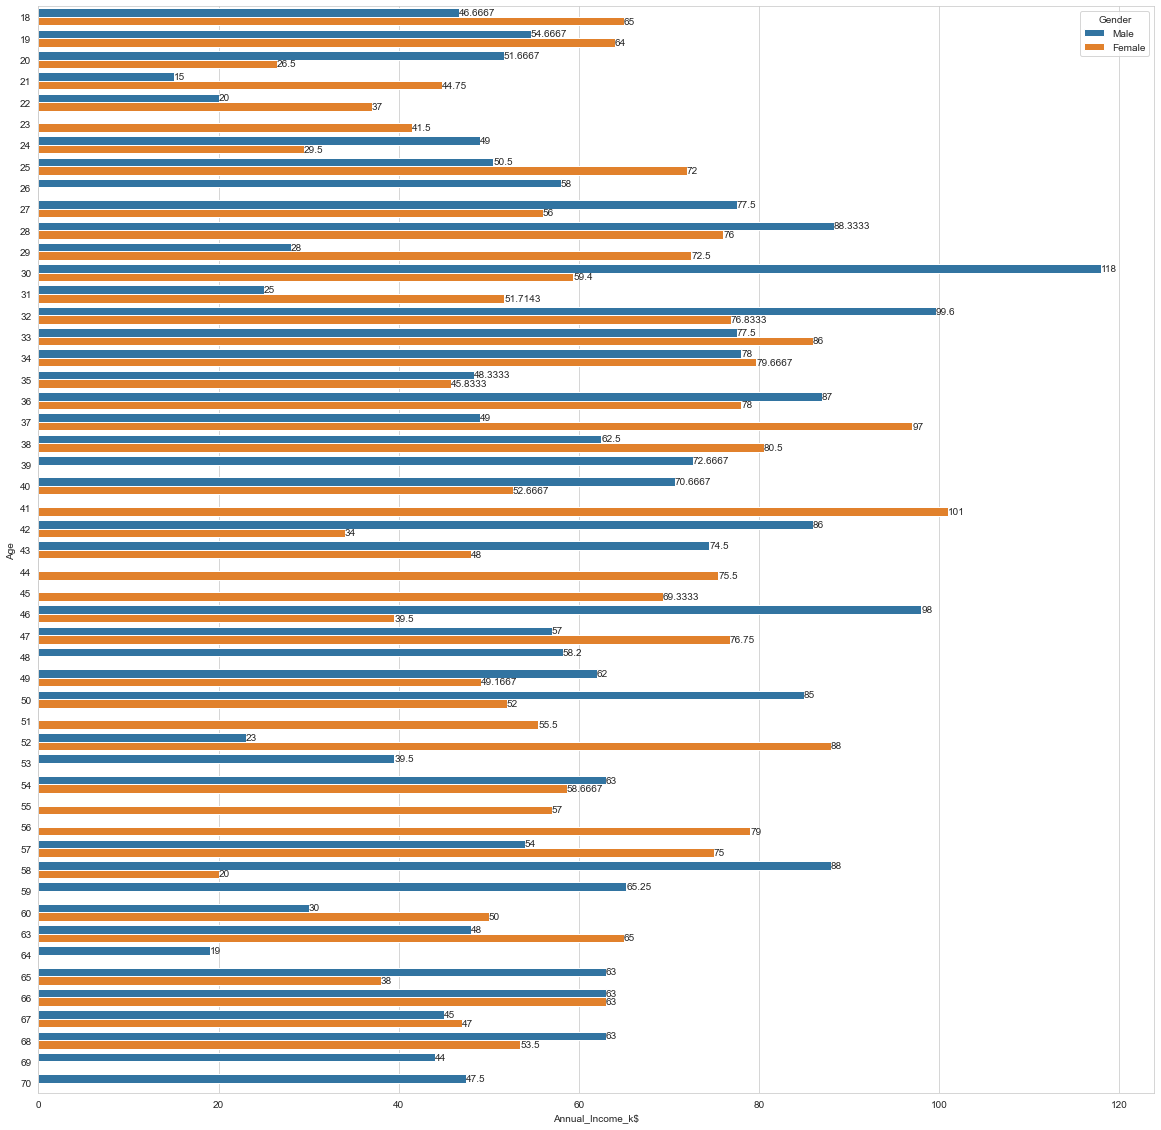

In [18]:
plt.figure(figsize=(20,20))

ax = sns.barplot(data=df, x="Annual_Income_k$", y="Age", hue="Gender", ci=None, orient= 'h')

for container in ax.containers:
    ax.bar_label(container);

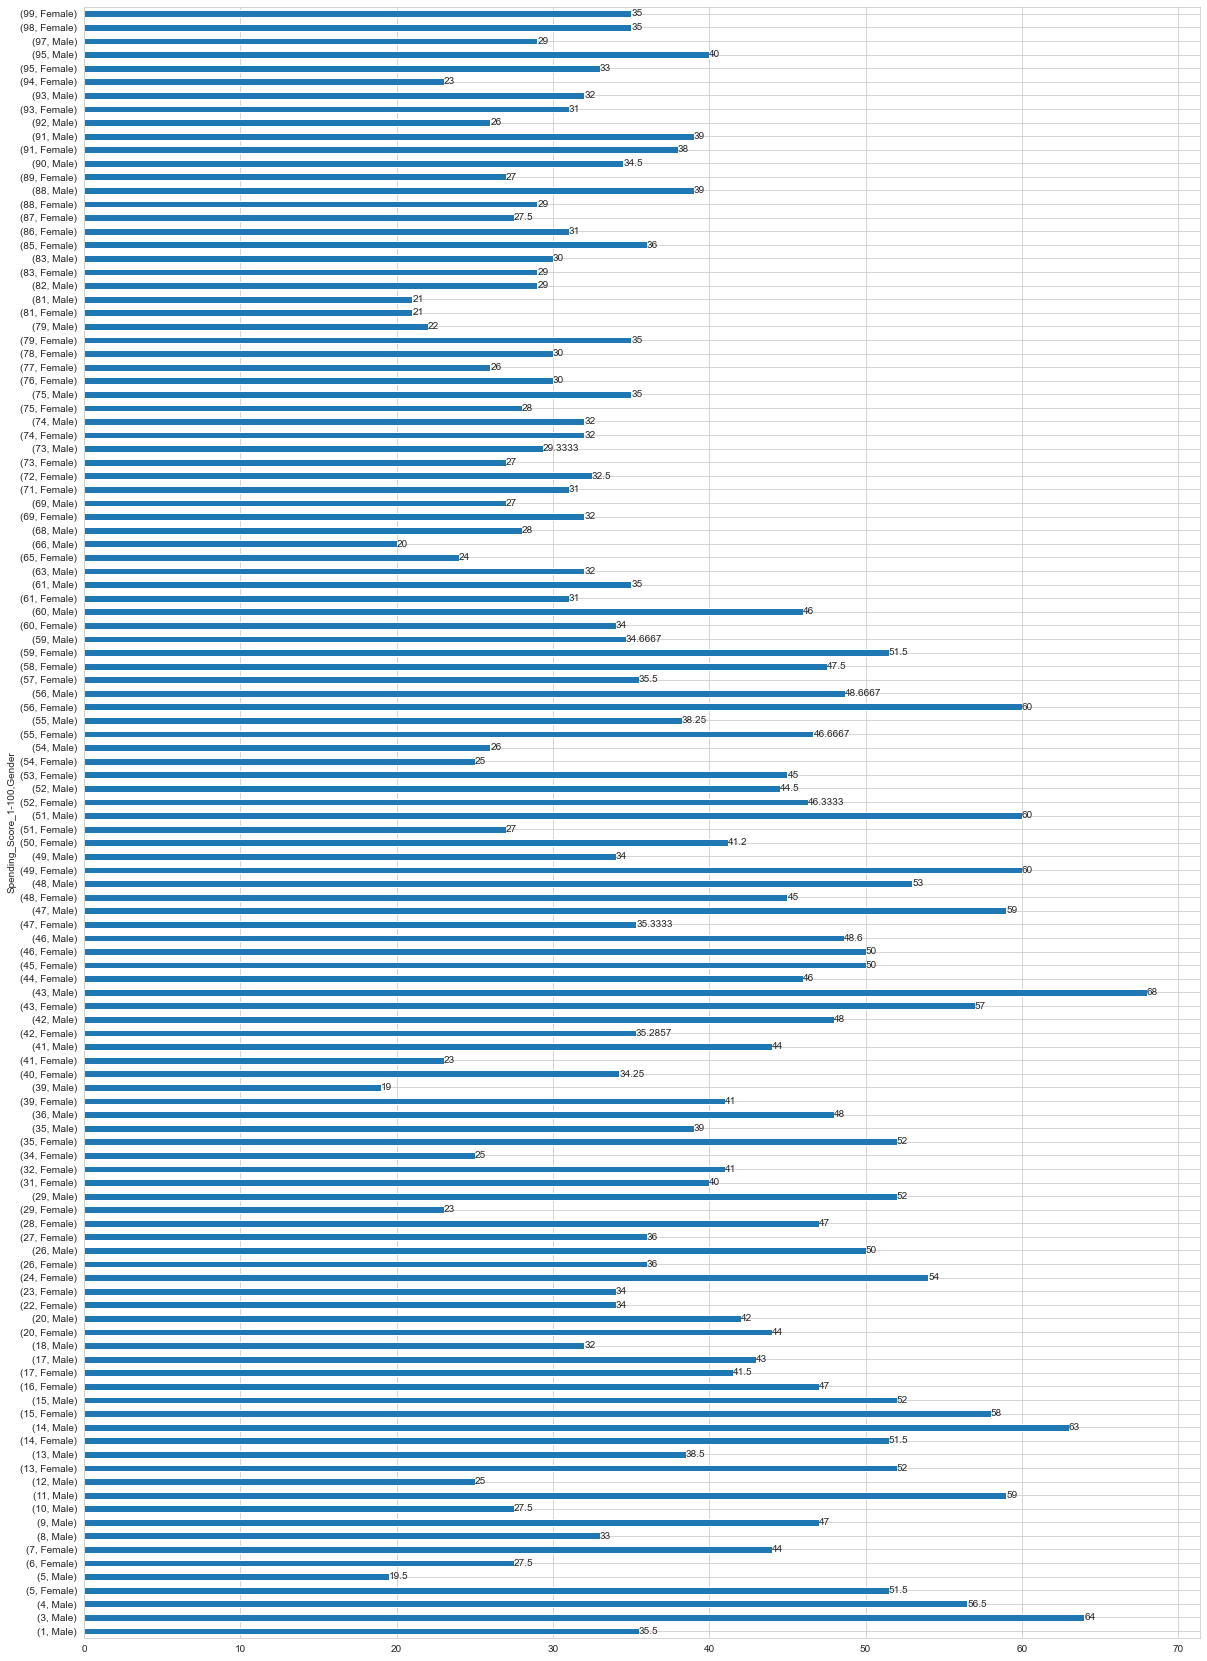

In [19]:
plt.figure(figsize=(20,30))

ax = df.groupby(["Spending_Score_1-100", "Gender"]).Age.mean().plot.barh()

for container in ax.containers:
    ax.bar_label(container);

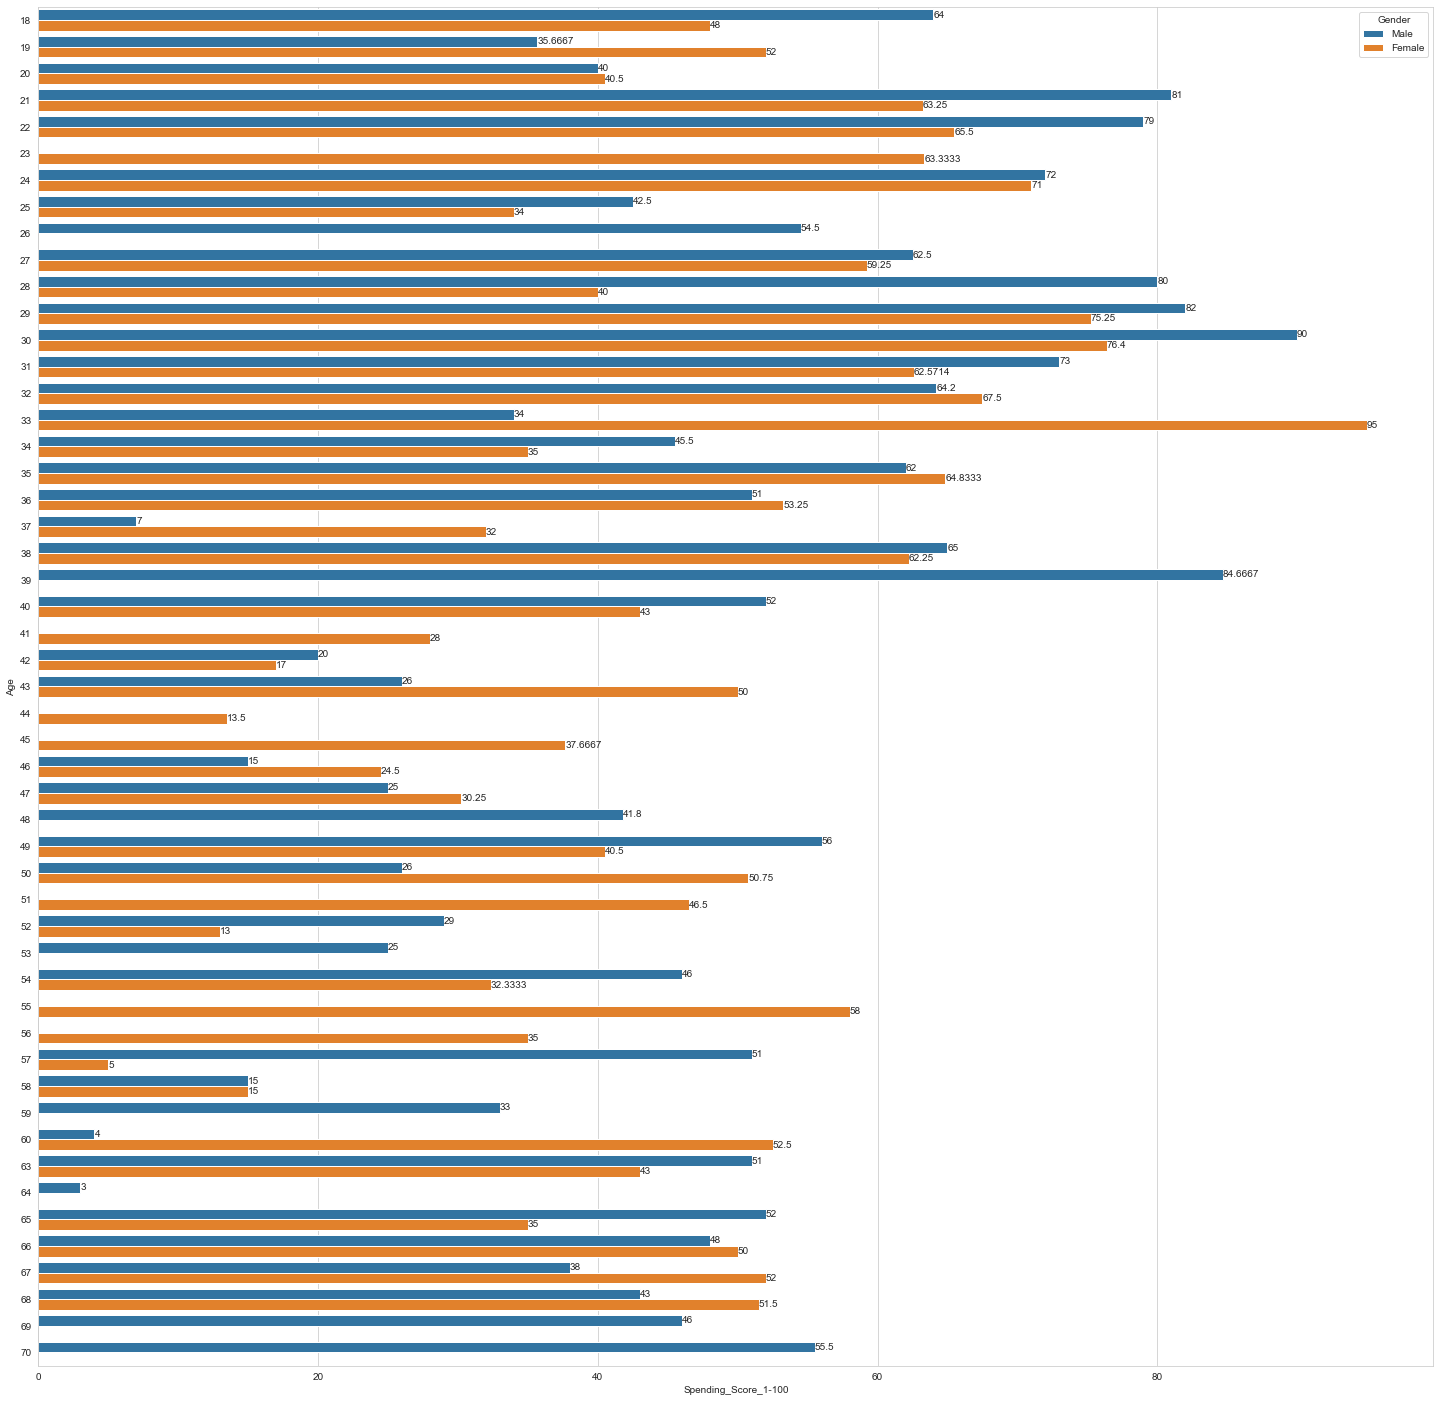

In [20]:
plt.figure(figsize=(25,25))

ax = sns.barplot(data=df, x="Spending_Score_1-100", y="Age", hue="Gender", ci=None, orient= 'h')

for container in ax.containers:
    ax.bar_label(container);

<Figure size 288x432 with 0 Axes>

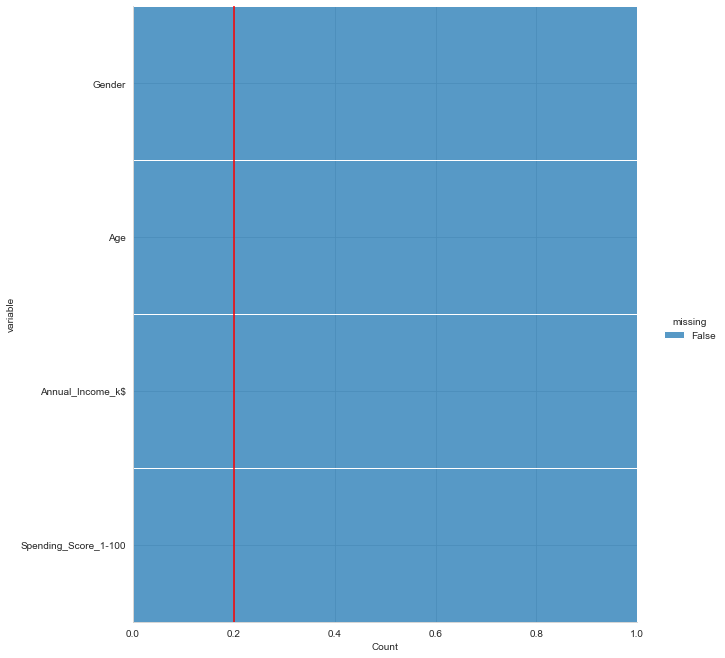

In [21]:
plt.figure(figsize=(4,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    height=9.25
)
plt.axvline(0.2,color="r");

(-1.25, 1.25, -1.25, 1.25)

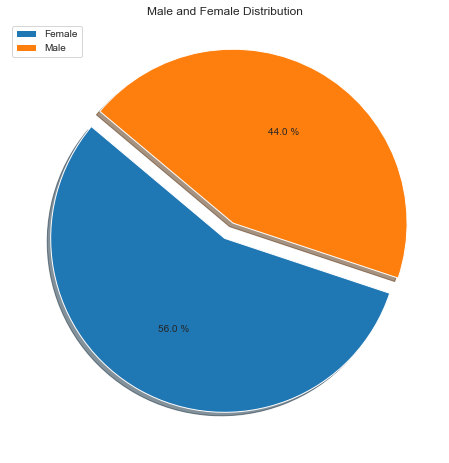

In [22]:
plt.figure(figsize=(8,8))

explode = [0,0.1]
plt.pie(df['Gender'].value_counts(), explode=explode,autopct='%1.1f %%', shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

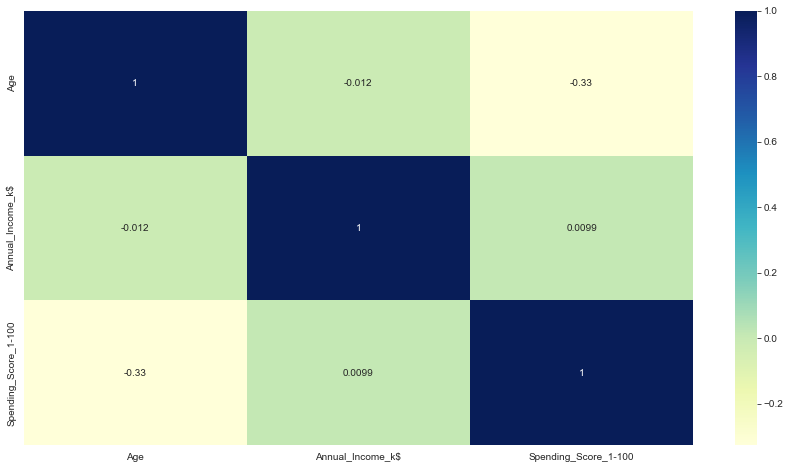

In [23]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), cmap="YlGnBu",annot=True)
plt.show()

<Figure size 1080x576 with 0 Axes>

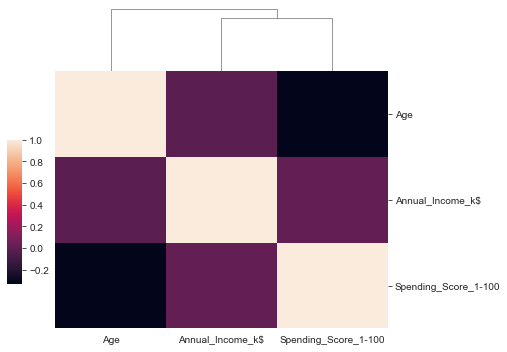

In [24]:
plt.figure(figsize=(15,8))
sns.clustermap(df.corr(),figsize=(7, 5),
               row_cluster=False,
               dendrogram_ratio=(.1, .2),
               cbar_pos=(0, .2, .03, .4))
plt.show()

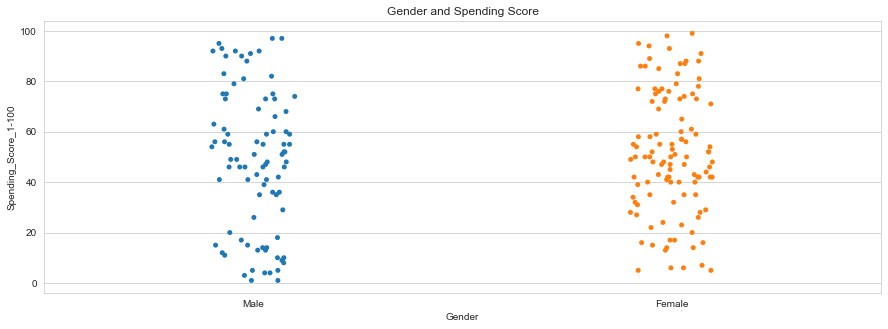

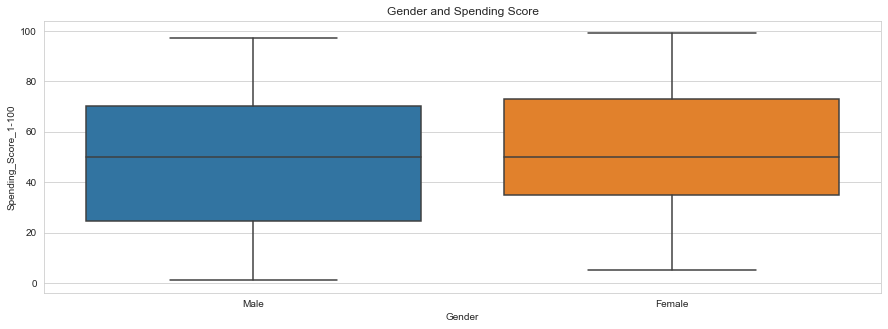

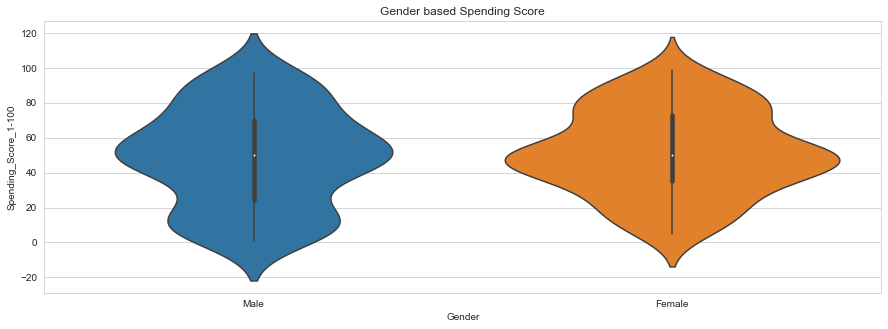

In [25]:
plt.figure(figsize=(15,5))
sns.stripplot(x='Gender', y='Spending_Score_1-100', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender', y='Spending_Score_1-100', data=df)
plt.title('Gender and Spending Score')
plt.show()

plt.figure(figsize=(15,5))
sns.violinplot(x='Gender', y='Spending_Score_1-100', data=df)
plt.title('Gender based Spending Score')
plt.show()

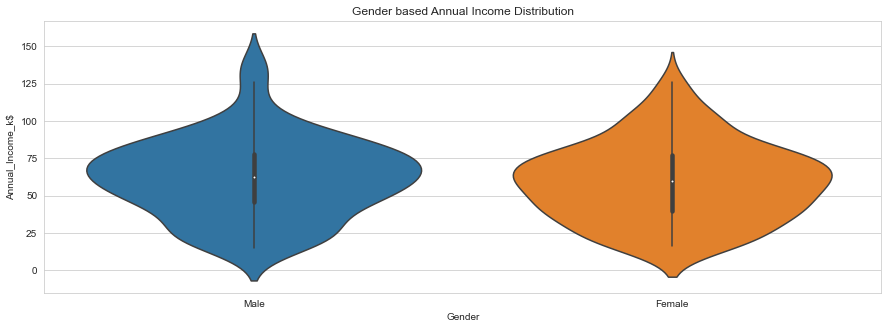

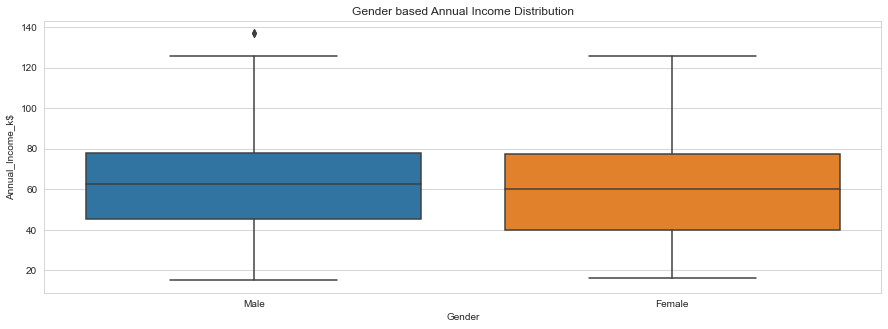

In [26]:
plt.figure(figsize=(15,5))
sns.violinplot(x='Gender',y='Annual_Income_k$', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x='Gender',y='Annual_Income_k$', data=df)
plt.title('Gender based Annual Income Distribution')
plt.show()

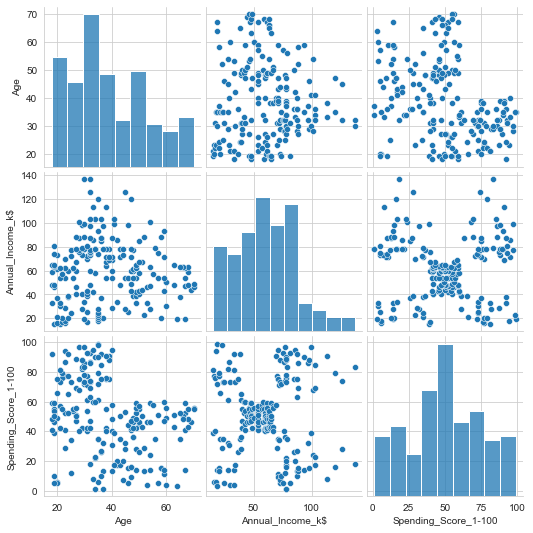

In [27]:
sns.pairplot(df)

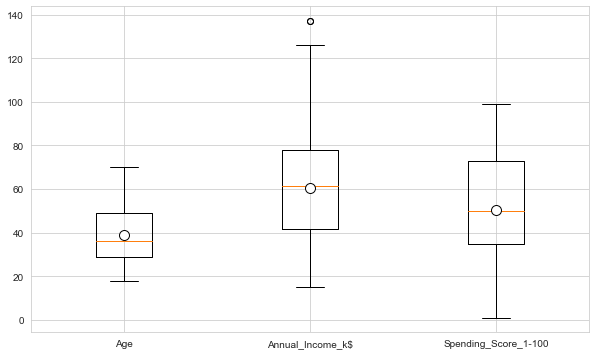

In [28]:
plt.boxplot((df[df.select_dtypes('number').columns]), 
            labels=df.select_dtypes('number').columns,
            showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                       "markersize":"10"});
plt.show()

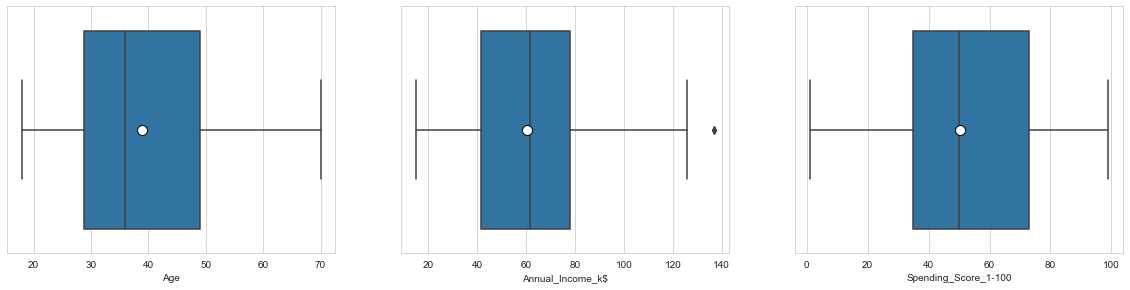

In [29]:
index = 0
plt.figure(figsize=(20, 10))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(2,3,index)
    sns.boxplot(x=feature, 
                data=df, 
                whis=1.5,
                showmeans=True,
                meanprops={"marker":"o",
                           "markerfacecolor":"white", 
                           "markeredgecolor":"black",
                           "markersize":"10"})

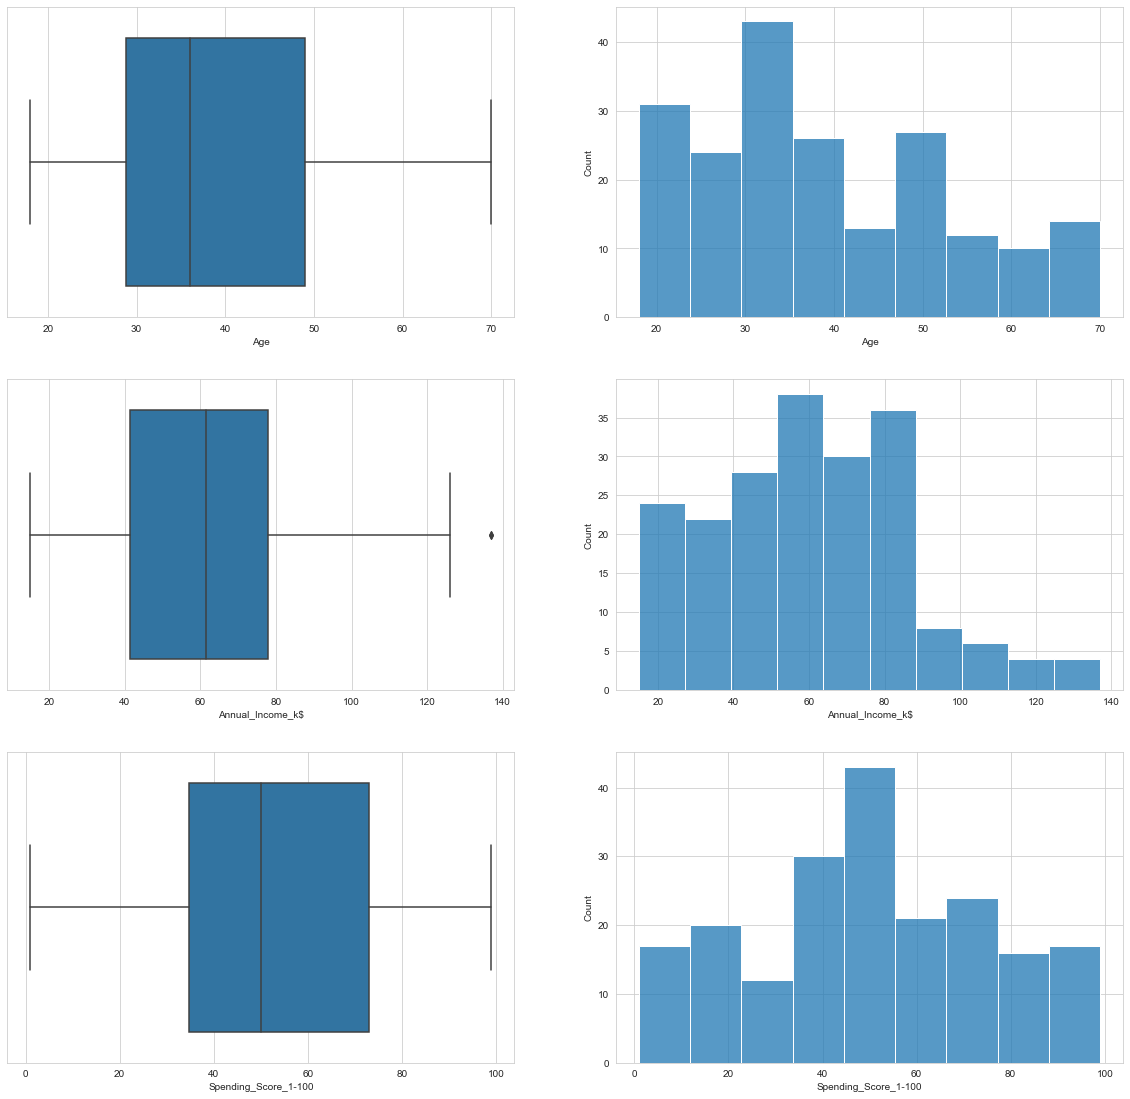

In [30]:
index = 0
plt.figure(figsize=(20, 40))
for feature in df.select_dtypes('number').columns:
    index += 1
    plt.subplot(6,2, index)
    sns.boxplot(x=feature, data=df, whis=1.5)
    index += 1
    plt.subplot(6,2,index)
    sns.histplot(x=feature, data=df)

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [31]:
df

,Gender,Age,Annual_Income_k$,Spending_Score_1-100
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [32]:
from pyclustertend import hopkins

In [33]:
X1 = df.loc[:,['Age','Spending_Score_1-100']]
X1

,Age,Spending_Score_1-100
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [34]:
#scaler = StandardScaler()
#X1 = scaler.fit_transform(X1)    # standart scaler ve fit yaptiktan sonra hopkins degeri artti!

In [35]:
hopkins(X1, X1.shape[0])

0.2904855995397731

#### *ii. Determine optimal number of clusters*

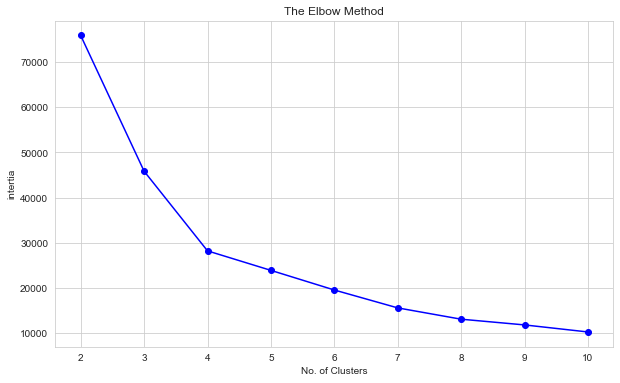

In [36]:
from sklearn.cluster import KMeans

intertia =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n,random_state=42)
    kmeans.fit(X1)
    intertia.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), intertia, "bo-")
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('intertia')
plt.show()

In [37]:
intertia

[75949.15601023017,
 45840.67661610868,
 28165.583566629342,
 23838.24882164619,
 19483.1179104427,
 15514.193134351031,
 13006.483628851023,
 11738.020296954506,
 10173.039478114479]

In [38]:
pd.Series(intertia).diff()

0         NaN
1   -30108.48
2   -17675.09
3    -4327.33
4    -4355.13
5    -3968.92
6    -2507.71
7    -1268.46
8    -1564.98
dtype: float64

In [39]:
df_diff =pd.DataFrame(-pd.Series(intertia).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,30108.48
3,17675.09
4,4327.33
5,4355.13
6,3968.92
7,2507.71
8,1268.46
9,1564.98


<AxesSubplot:>

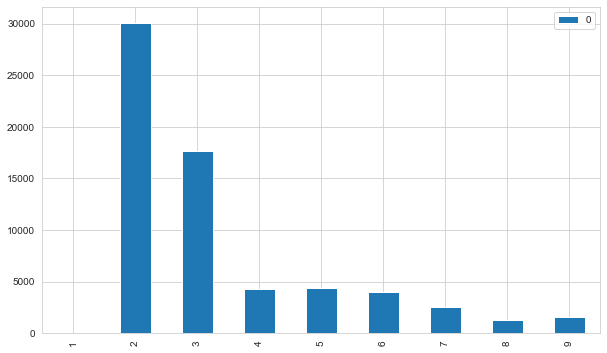

In [40]:
df_diff.plot(kind='bar')

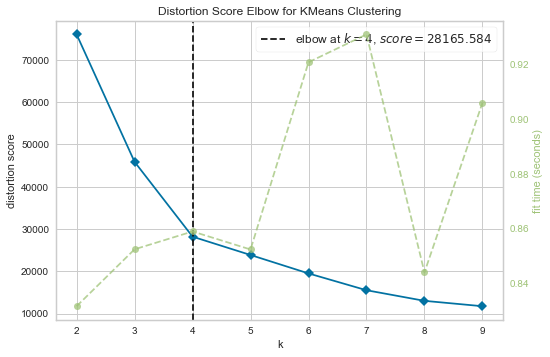

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof()

In [42]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


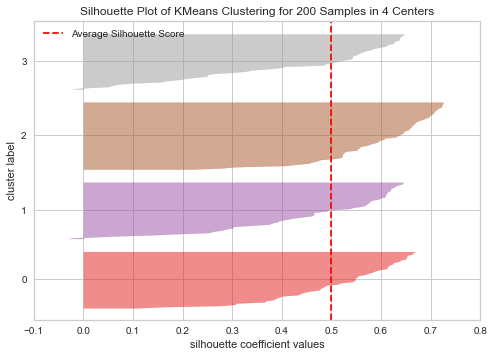

In [43]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X1)    # Fit the data to the visualizer
visualizer.poof();

### Why silhouette_score is negative?

In [105]:
#![image.png](attachment:image.png)

#### *iii. Apply K Means*

In [44]:
kmeans = KMeans(n_clusters = 4)

In [45]:
kmeans.fit_predict(X1)

array([1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 1, 2, 0, 1, 0,
       2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 0, 3, 1,
       2, 1, 3, 1, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 3, 1,
       1, 3, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3,
       3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 0, 1, 0, 3, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

In [46]:
  X1["cluster_Kmeans"] = kmeans.fit_predict(X1)

In [47]:
X1

,Age,Spending_Score_1-100,cluster_Kmeans
0,19,39,0
1,21,81,1
2,20,6,2
3,23,77,1
4,31,40,0
...,...,...,...
195,35,79,1
196,45,28,2
197,32,74,1
198,32,18,2


#### *iv. Visualizing and Labeling All the Clusters*

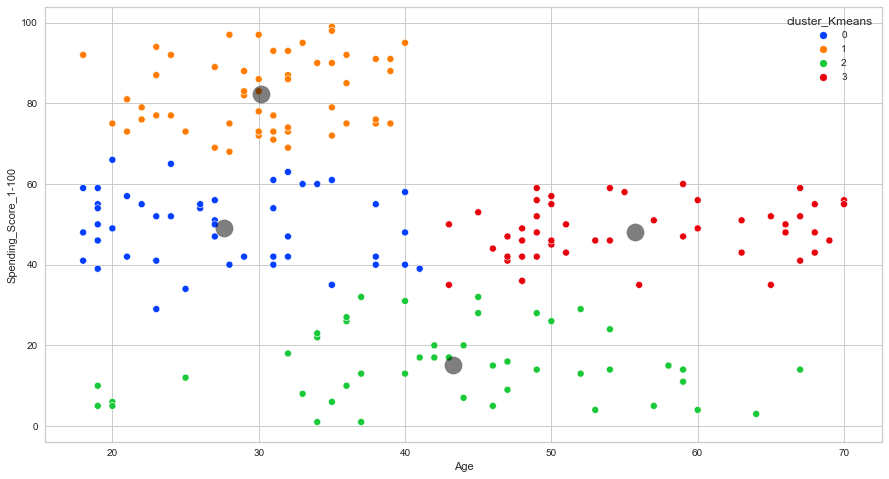

In [48]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Spending_Score_1-100', hue='cluster_Kmeans', data=X1, palette="bright")
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Clustering based on Annual Income and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [49]:
X2 = df.loc[:,['Annual_Income_k$','Spending_Score_1-100']]
X2.head()

,Annual_Income_k$,Spending_Score_1-100
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [50]:
hopkins(X2,X2.shape[0])

0.28068076639717193

#### *ii. Determine optimal number of clusters*

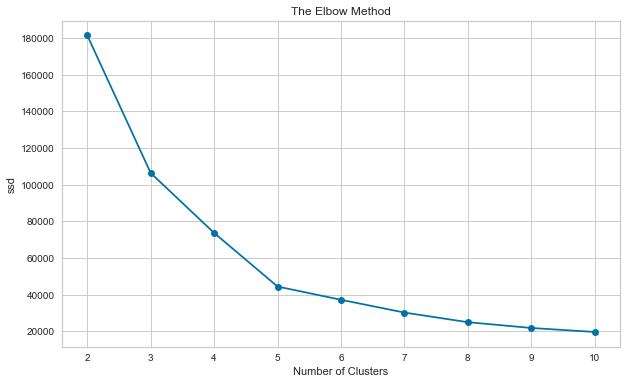

In [51]:
ssd =[]
for n in range(2,11):
    kmeans=KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)
plt.figure(figsize=(10,6))
plt.plot(range(2, 11), ssd, "bo-")
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('ssd')
plt.show()

In [52]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,75015.22
3,32668.58
4,29231.33
5,7214.64
6,6974.16
7,5247.82
8,3149.75
9,2190.02


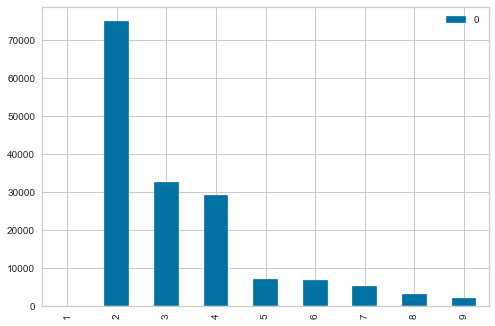

In [53]:
df_diff.plot(kind='bar');

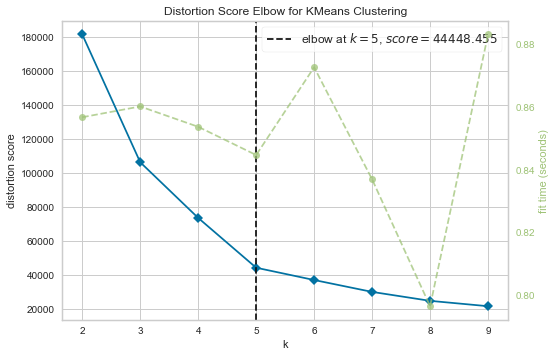

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [54]:
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans(random_state=42)
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X2)
visu.poof()

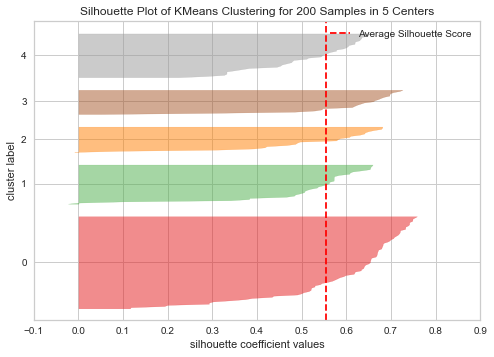

In [55]:
model4 = KMeans(n_clusters=5, random_state=42)
visualizer = SilhouetteVisualizer(model4)

visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof();

In [56]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


#### *iii. Apply K Means*

In [57]:
kmeans2 = KMeans(n_clusters=5, random_state=42)
kmeans2.fit_predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [58]:
X2['cluster_Kmeans'] = kmeans2.fit_predict(X2)
X2

,Annual_Income_k$,Spending_Score_1-100,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


In [59]:
import sklearn
sklearn.__version__

'1.1.2'

#### *iv. Visualizing and Labeling All the Clusters*

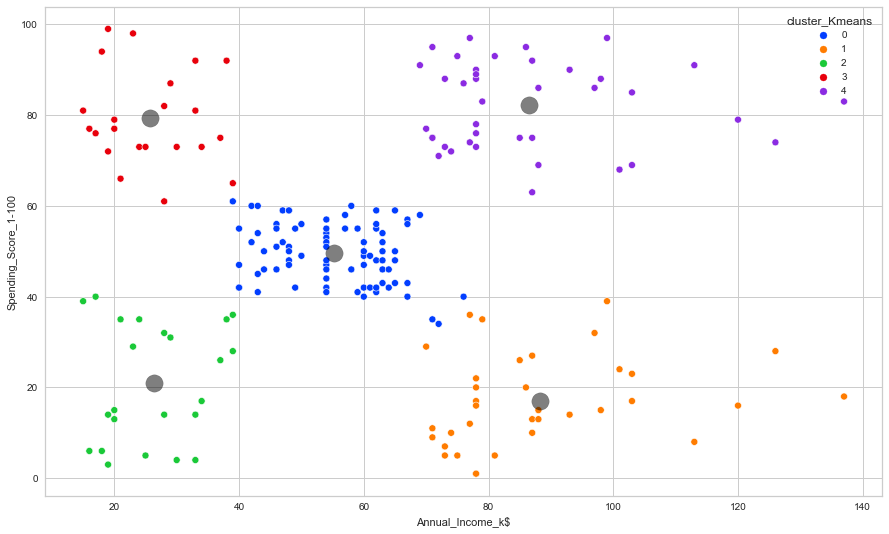

In [60]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income_k$', y='Spending_Score_1-100', hue='cluster_Kmeans', data=X2, palette="bright")
centers = kmeans2.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.5)

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

In [61]:
from scipy.cluster.hierarchy import linkage

In [62]:
hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete")
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

In [63]:
from scipy.cluster.hierarchy import dendrogram

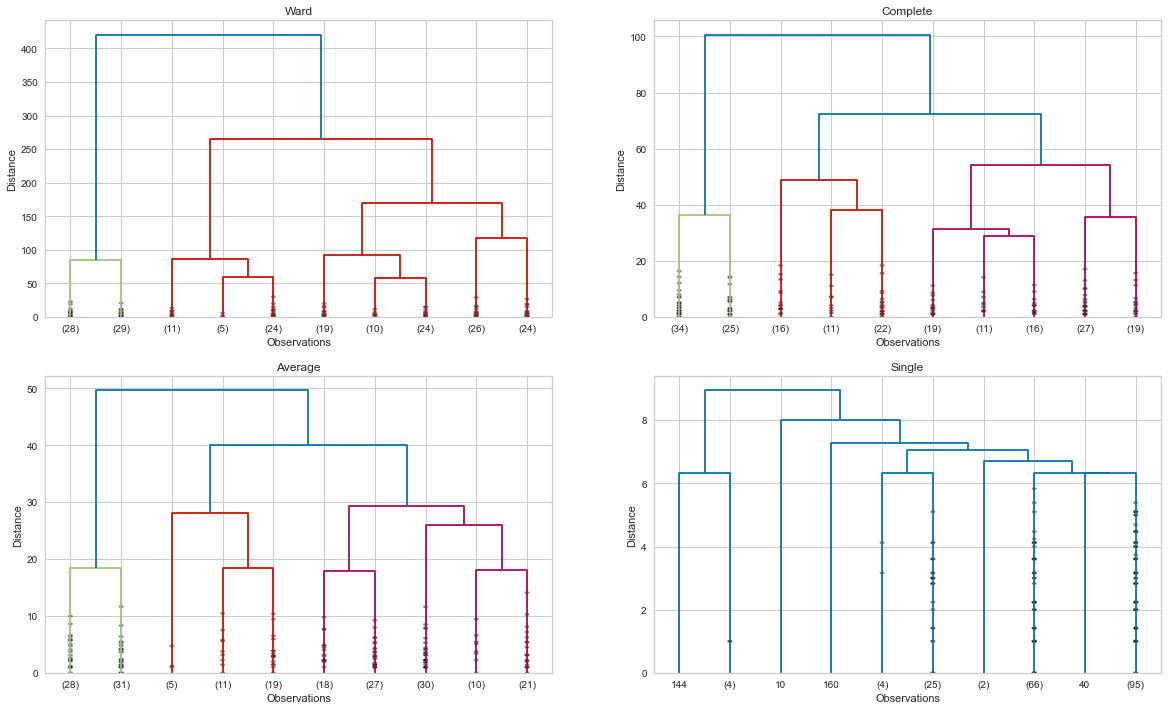

In [64]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

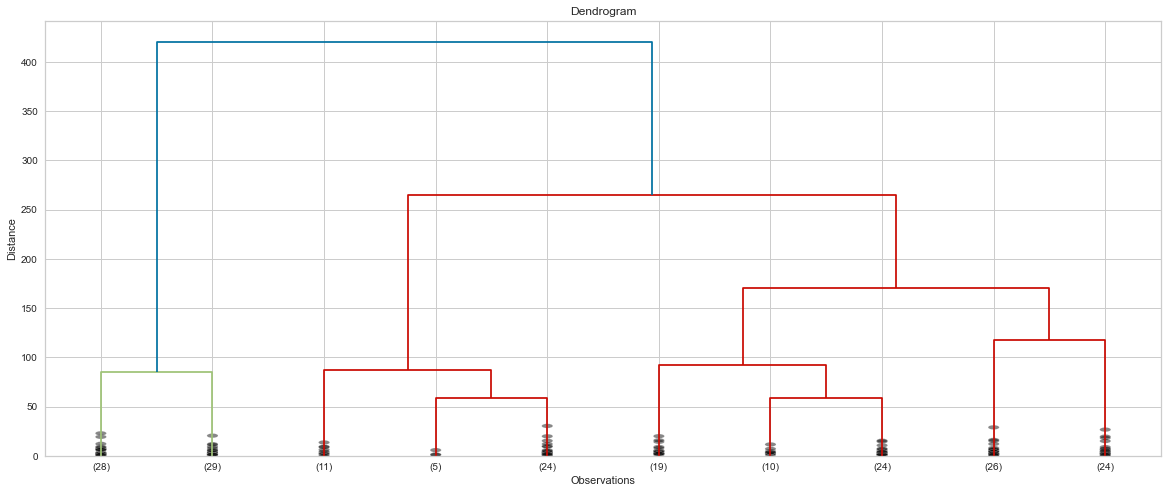

In [65]:
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [66]:
from sklearn.cluster import AgglomerativeClustering

In [67]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.45437524400798707
For n_clusters=3, the silhouette score is 0.4403939907045589
For n_clusters=4, the silhouette score is 0.4605877438219549
For n_clusters=5, the silhouette score is 0.4039101313348303
For n_clusters=6, the silhouette score is 0.4122277010437696
For n_clusters=7, the silhouette score is 0.4154024433868577
For n_clusters=8, the silhouette score is 0.387772181711837
For n_clusters=9, the silhouette score is 0.39419016298118076
For n_clusters=10, the silhouette score is 0.38799839181574464


## Clustering based on Annual Income and Spending Score- x2

In [68]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

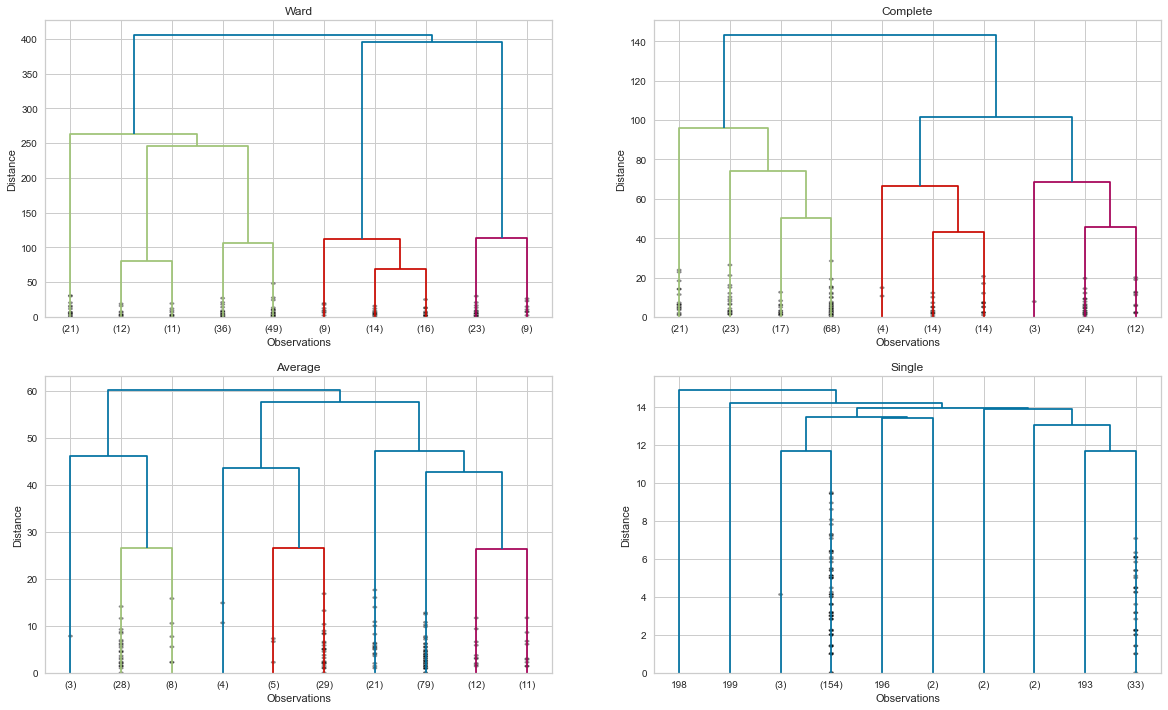

In [69]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

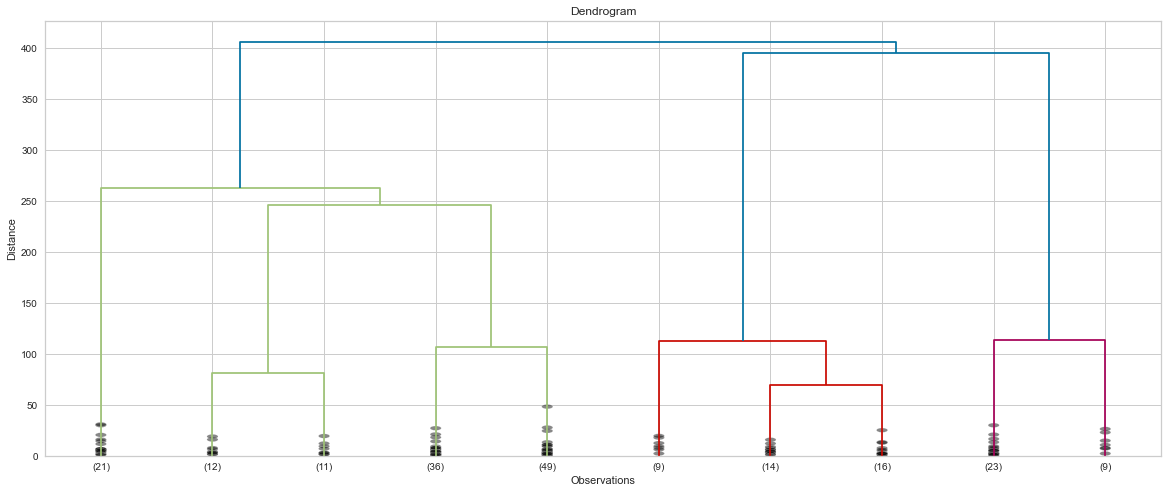

In [70]:

plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, show_contracted = True, leaf_font_size = 10);

In [71]:
from sklearn.metrics import silhouette_score
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36737734620684265
For n_clusters=3, the silhouette score is 0.462308734038414
For n_clusters=4, the silhouette score is 0.4924899099064366
For n_clusters=5, the silhouette score is 0.5541332798644271
For n_clusters=6, the silhouette score is 0.5390996397382017
For n_clusters=7, the silhouette score is 0.520894822141792
For n_clusters=8, the silhouette score is 0.43313054817610713
For n_clusters=9, the silhouette score is 0.43944465774630276
For n_clusters=10, the silhouette score is 0.4345958236001419


### ii. *Apply Agglomerative Clustering*

#### Age and Spending Score- x1

In [72]:
Agg1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
y_agg= Agg1.fit_predict(X1)

In [73]:
X1['cluster_Agg'] = y_agg
X1.head()

,Age,Spending_Score_1-100,cluster_Kmeans,cluster_Agg
0,19,39,0,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,0,0


#### Annual Income and Spending Score- x2

In [74]:
Agg2 = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
y_agg2 = Agg2.fit_predict(X2)

In [75]:
X2['cluster_Agg'] = y_agg2
X2.head()

,Annual_Income_k$,Spending_Score_1-100,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

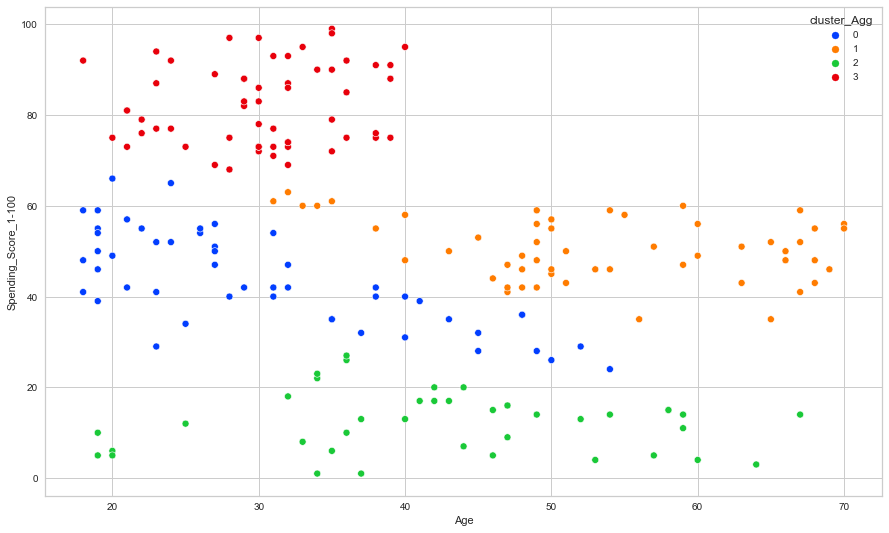

In [76]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Age', y='Spending_Score_1-100', hue='cluster_Agg', data=X1, palette="bright");

Text(0.5, 1.0, 'Agg')

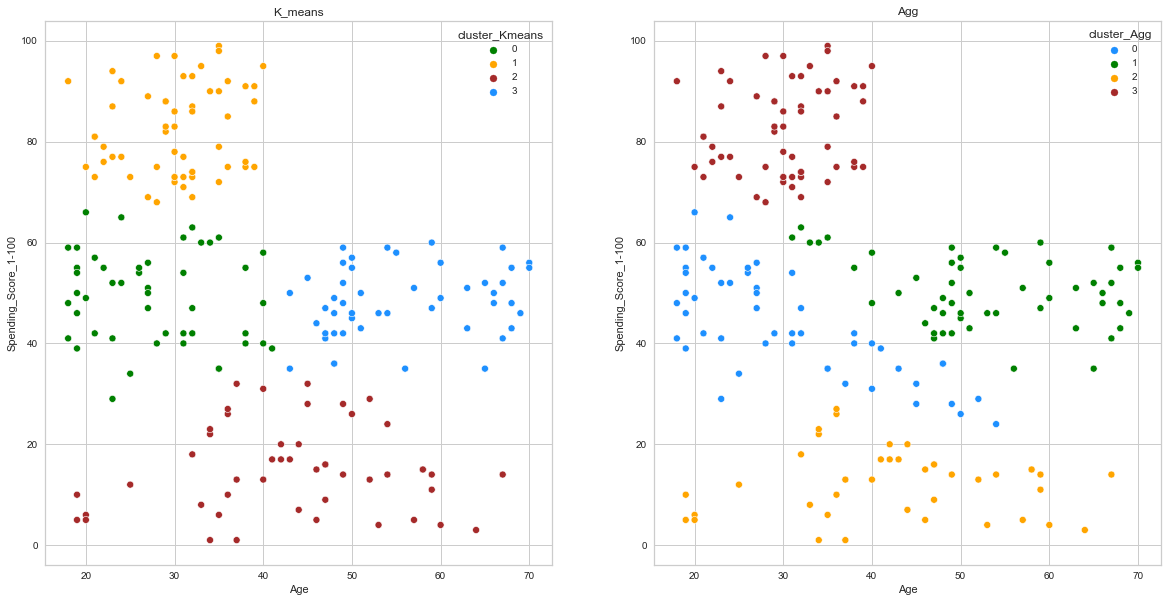

In [81]:
plt.figure(figsize = (20,10))

plt.subplot(121)
sns.scatterplot(x='Age', y='Spending_Score_1-100', hue='cluster_Kmeans', data=X1,palette=['green','orange','brown',
                                                                             'dodgerblue'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Age', y='Spending_Score_1-100', hue='cluster_Agg', data=X1,palette=['dodgerblue','green',
                                                                              'orange','brown'])
plt.title("Agg")

#### Annual Income and Spending Score- x2

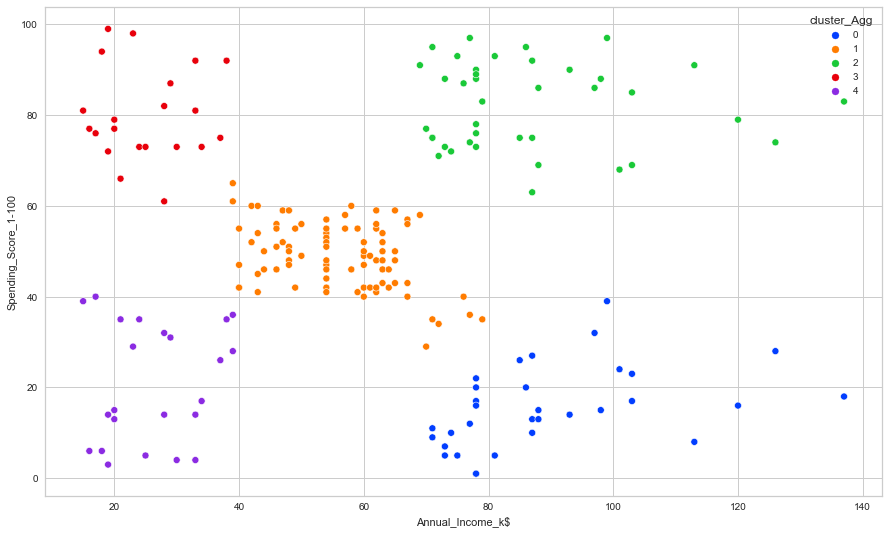

In [82]:
plt.figure(figsize=(15,9))
sns.scatterplot(x='Annual_Income_k$', y='Spending_Score_1-100', hue='cluster_Agg', data=X2 ,palette="bright");

Text(0.5, 1.0, 'Agg')

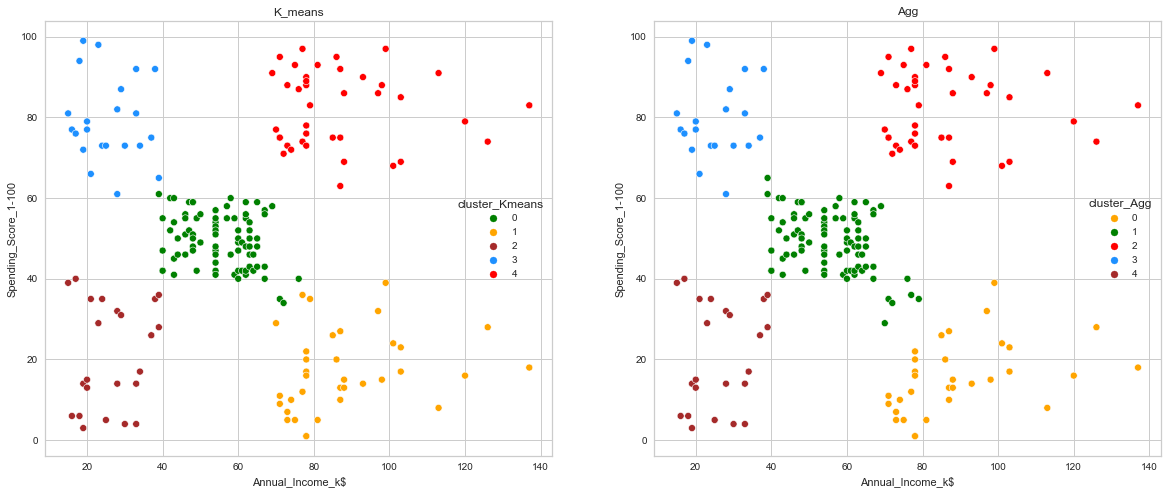

In [84]:
plt.figure(figsize = (20,8))

plt.subplot(121)
sns.scatterplot(x='Annual_Income_k$', y='Spending_Score_1-100', hue='cluster_Kmeans', data=X2, palette=['green', 'orange',
                                                            'brown','dodgerblue','red'])
plt.title("K_means")
plt.subplot(122)
sns.scatterplot(x='Annual_Income_k$', y='Spending_Score_1-100', hue='cluster_Agg', data=X2, palette=['orange', 'green',
                                                            'red', 'dodgerblue', 'brown'])
plt.title("Agg")

#### Interpretation based on Age and Spending Score- x1

In [85]:
X1.head()

,Age,Spending_Score_1-100,cluster_Kmeans,cluster_Agg
0,19,39,0,0
1,21,81,1,3
2,20,6,2,2
3,23,77,1,3
4,31,40,0,0


In [86]:
X1.cluster_Kmeans.value_counts()

1    57
2    48
3    48
0    47
Name: cluster_Kmeans, dtype: int64

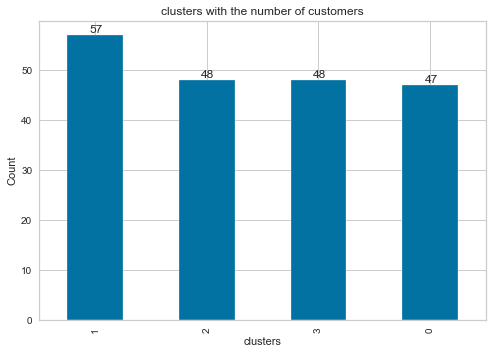

In [87]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1.cluster_Kmeans.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [88]:
df["cluster_Age_Spending_Score"] = X1.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income_k$,Spending_Score_1-100,cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,0


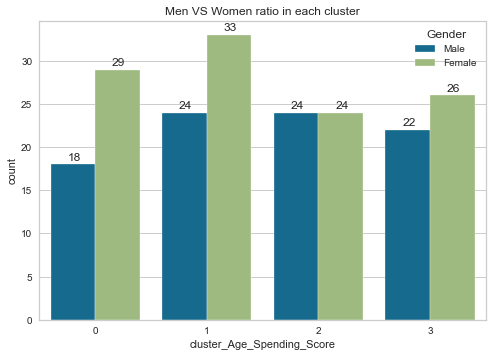

In [89]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

In [90]:
df.groupby("cluster_Age_Spending_Score").mean()

,Age,Annual_Income_k$,Spending_Score_1-100
cluster_Age_Spending_Score,,,
0,27.62,53.28,49.15
1,30.18,66.07,82.35
2,43.29,66.94,15.02
3,55.71,54.77,48.23


<AxesSubplot:xlabel='cluster_Age_Spending_Score', ylabel='Spending_Score_1-100'>

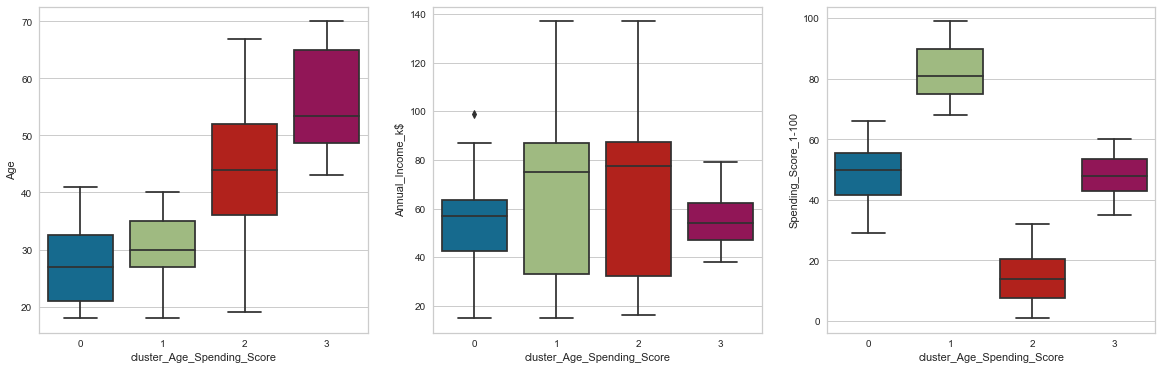

In [92]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Age_Spending_Score", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income_k$", x = "cluster_Age_Spending_Score",  data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score_1-100", x = "cluster_Age_Spending_Score", data = df)

<Figure size 1440x432 with 0 Axes>

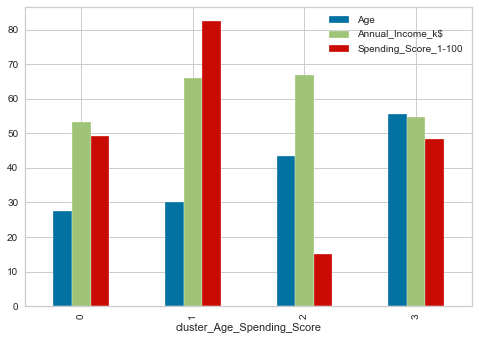

In [93]:
plt.figure(figsize = (20,6))
df.groupby("cluster_Age_Spending_Score").mean().plot(kind='bar')
plt.show()

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [94]:
X2

,Annual_Income_k$,Spending_Score_1-100,cluster_Kmeans,cluster_Agg
0,15,39,2,4
1,15,81,3,3
2,16,6,2,4
3,16,77,3,3
4,17,40,2,4
...,...,...,...,...
195,120,79,4,2
196,126,28,1,0
197,126,74,4,2
198,137,18,1,0


In [95]:
X2.cluster_Kmeans.value_counts()

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

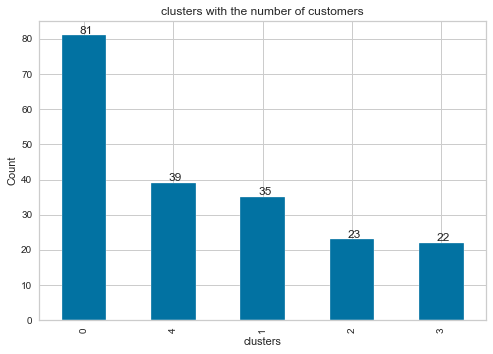

In [96]:
# lets see the number of poeple lie in each group
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X2.cluster_Kmeans.value_counts().plot(kind='bar')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.2, p.get_height() + 0.5))

In [97]:
df.head()

,Gender,Age,Annual_Income_k$,Spending_Score_1-100,cluster_Age_Spending_Score
0,Male,19,15,39,0
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,0


In [98]:
df.drop(columns= "cluster_Age_Spending_Score", inplace=True)

In [99]:
df["cluster_Annual_Income_Spending_Score"] = X2.cluster_Kmeans
df.head()

,Gender,Age,Annual_Income_k$,Spending_Score_1-100,cluster_Annual_Income_Spending_Score
0,Male,19,15,39,2
1,Male,21,15,81,3
2,Female,20,16,6,2
3,Female,23,16,77,3
4,Female,31,17,40,2


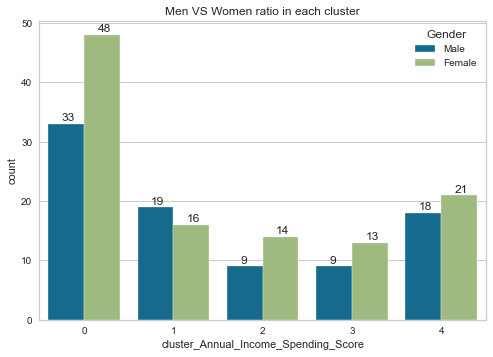

In [100]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax =sns.countplot(x=df.cluster_Annual_Income_Spending_Score, hue=df.Gender)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() +0.15, p.get_height() + 0.5))

In [101]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean()

Age  Annual_Income_k$  \
Gender cluster_Annual_Income_Spending_Score                           
Female 0                                    40.90             55.35   
       1                                    43.25             90.94   
       2                                    43.21             27.36   
       3                                    25.46             25.69   
       4                                    32.19             86.05   
Male   0                                    45.36             55.21   
       1                                    39.32             85.89   
       2                                    48.33             24.67   
       3                                    25.00             25.78   
       4                                    33.28             87.11   

                                             Spending_Score_1-100  
Gender cluster_Annual_Income_Spending_Score                        
Female 0                                                    49.00  
       1                                                    22.06  
       2                                                    21.71  
       3                                                    80.54  
       4                                                    81.67  
Male   0                                                    50.27  
       1                                                    12.95  
       2                                                    19.67  
       3                                                    77.67  
       4                                                    82.67

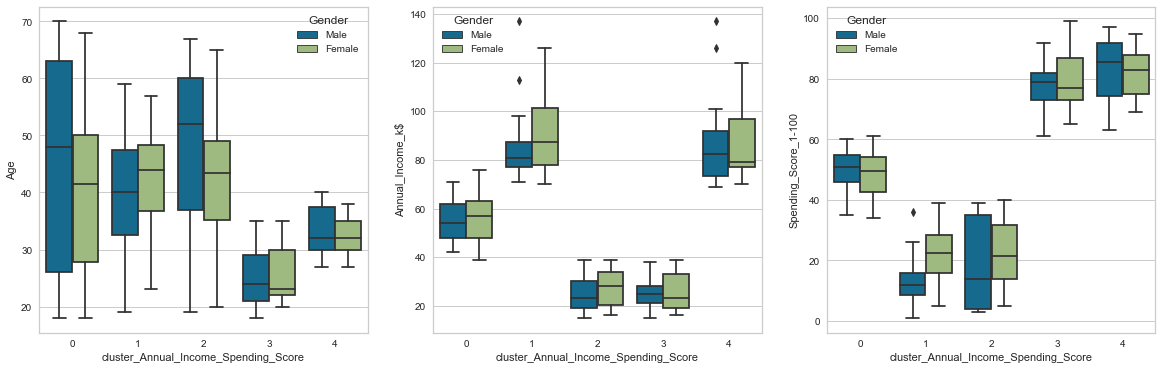

In [102]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(y = "Age", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(132)
sns.boxplot(y = "Annual_Income_k$", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df)

plt.subplot(133)
sns.boxplot(y = "Spending_Score_1-100", x = "cluster_Annual_Income_Spending_Score", hue= "Gender", data = df);

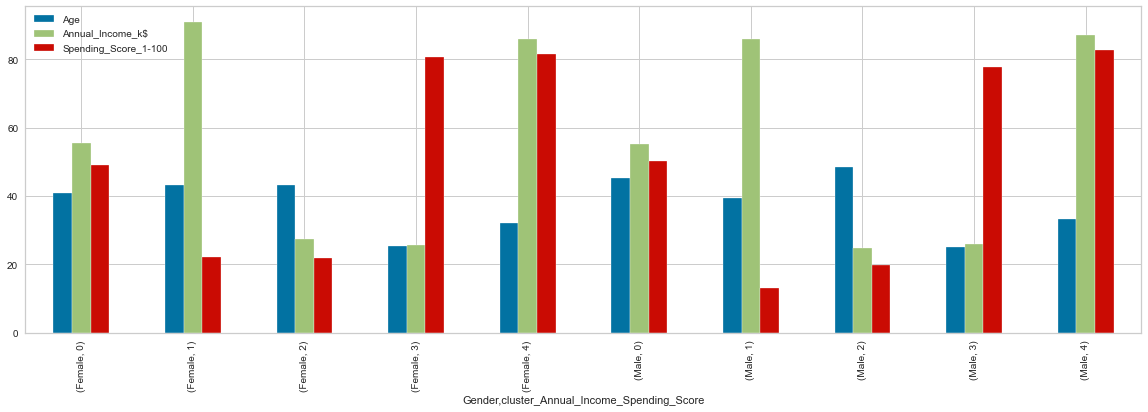

In [103]:
df.groupby(["Gender", "cluster_Annual_Income_Spending_Score"]).mean().plot(kind="bar", figsize=(20,6))
plt.show()

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

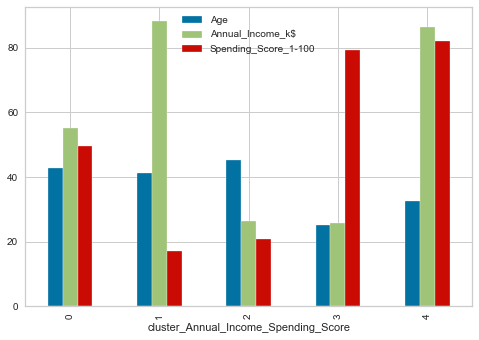

In [104]:
df.groupby("cluster_Annual_Income_Spending_Score").mean().plot(kind='bar')
plt.show()

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___